In [1]:
import pandas as pd
df = pd.read_csv('out_ml_original.csv')

In [2]:
df

,no,time:timestamp,name,TOC,activity,Priority_Code,case_id,DeviceType,Device,event_message
0,2,2017-05-01 00:00:01.000,ML,TMS,TOCPB,4,Substation1265,BLKCAR,STUTR_PR1_UPLC,Substation1265 BLKCAR STUTR_PR1_UPLC CARRIER L...
1,10,2017-05-01 00:00:02.000,ML,TMS,TOCED,4,Substation232,BLKCAR,Device689,Substation232 BLKCAR Device689 SIGNAL RECEIVED...
2,13,2017-05-01 00:00:02.000,ML,TMS,TOCBR,4,Substation611,BLKCAR,L752_PULSAR,Substation611 BLKCAR L752_PULSAR SIGNAL RECEIV...
3,14,2017-05-01 00:00:02.000,ML,TMS,TOCED,4,Substation78,BLKCAR,Device753,Substation78 BLKCAR Device753 SIGNAL RECEIVED ...
4,18,2017-05-01 00:00:03.000,ML,TMS,TOCSR,4,Substation1051,BLKCAR,Device292,Substation1051 BLKCAR Device292 SIGNAL RECEIVE...
...,...,...,...,...,...,...,...,...,...,...
1215,99694,2017-05-01 11:36:13.000,ML,TMS,TOCLF,4,Substation761,LN,Device1367,Substation761 LN Device1367 SIGNAL XMIT NORMAL...
1216,99804,2017-05-01 11:36:42.000,ML,TMS,TOCNL,4,Substation1058,BLKCAR,R2362_PLANT,Substation1058 BLKCAR R2362_PLANT SIGNAL RECEI...
1217,99809,2017-05-01 11:36:44.000,ML,TMS,TOCNL,4,Substation1058,BLKCAR,R2362_PLANT,Substation1058 BLKCAR R2362_PLANT SIGNAL RECEI...
1218,99815,2017-05-01 11:36:46.000,ML,TMS,TOCNL,4,Substation1058,BLKCAR,R2362_PLANT,Substation1058 BLKCAR R2362_PLANT SIGNAL RECEI...


In [3]:
x = df.drop(['activity'], axis=1)
y = df['activity']

Class Distribution

In [4]:
y.value_counts()

activity
TOCNL     188
TOCLR     172
TOCBR     136
TOCGR     129
TOCFC     121
TOCPA     118
TOCPB      77
TOCED      51
TOCMN      38
TOCOG      35
TOCLC      32
TOCWN      30
TOCHS      22
TOCSR      22
TOCBM      20
TOCLF      10
TOCBY       6
TOCSE       4
TOCMS       4
TOCMSS      2
TOCFCS      2
TOCPBS      1
Name: count, dtype: int64

<Axes: ylabel='count'>

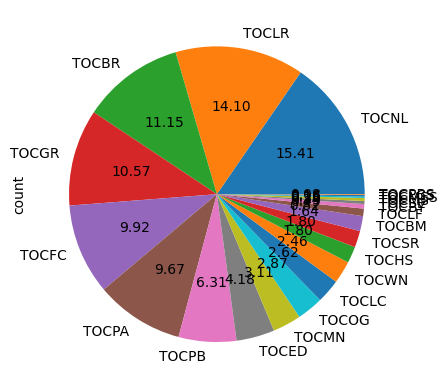

In [5]:
y.value_counts().plot.pie(autopct='%.2f')

Random Oversampling 
"not majority" = resample all classes but the majority class

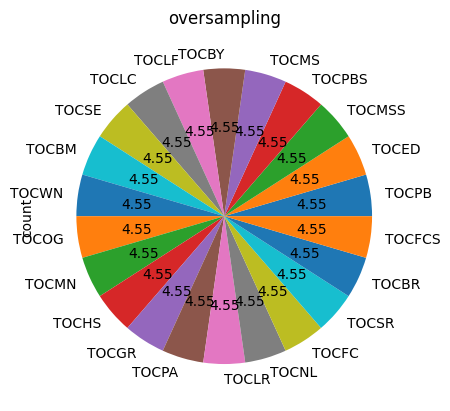

In [6]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")

x_res, y_res = ros.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("oversampling")


In [7]:
y_res.value_counts()

activity
TOCPB     188
TOCED     188
TOCMSS    188
TOCPBS    188
TOCMS     188
TOCBY     188
TOCLF     188
TOCLC     188
TOCSE     188
TOCBM     188
TOCWN     188
TOCOG     188
TOCMN     188
TOCHS     188
TOCGR     188
TOCPA     188
TOCLR     188
TOCNL     188
TOCFC     188
TOCSR     188
TOCBR     188
TOCFCS    188
Name: count, dtype: int64

Train-Test for Classification

In [8]:
#Import necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [9]:
#Load and Preprocess the Dataset:
#Assuming your dataset is in a CSV file, you can load and preprocess it using pandas. Convert the timestamp strings into numeric features that the classifier can work with.


# Load the CSV file into a pandas DataFrame
data = pd.read_csv('out_ml_original.csv')

# Convert the timestamp string column to datetime format
data['time:timestamp'] = pd.to_datetime(data['time:timestamp'])

# Extract relevant features from the timestamp (e.g., hour, minute, etc.)
data['hour'] = data['time:timestamp'].dt.hour
data['minute'] = data['time:timestamp'].dt.minute
# Add more datetime-related features as needed

# Drop the original timestamp column and any other columns that are not needed
data.drop(columns=['time:timestamp', 'event_message'], inplace=True)

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Priority_Code','activity'])  # Adjust the columns as needed
y = data['activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)



In [10]:
# summarize the sonar dataset
from pandas import read_csv
import numpy as np
# load dataset

dataframe = pd.read_csv('out_ml_original.csv', header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(1221, 9) (1221,)


In [11]:

# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(1221, 9) (1221,)


In [12]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(818, 9) (403, 9) (818,) (403,)


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
data = dataframe.values

In [15]:
print(X.shape, y.shape)

(1221, 9) (1221,)


In [17]:
model = RandomForestClassifier(random_state=1)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('out_ml_original.csv')

# Convert the timestamp string column to datetime format
data['time:timestamp'] = pd.to_datetime(data['time:timestamp'])

# Extract relevant features from the timestamp
data['hour'] = data['time:timestamp'].dt.hour
data['minute'] = data['time:timestamp'].dt.minute
data['day_of_week'] = data['time:timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data['day_of_month'] = data['time:timestamp'].dt.day
data['month'] = data['time:timestamp'].dt.month
data['year'] = data['time:timestamp'].dt.year
# Add more datetime-related features as needed

# Drop the original timestamp column and any other columns that are not needed
data.drop(columns=['time:timestamp', 'event_message', 'TOC', 'case_id'], inplace=True)

# Separate categorical and numerical columns
categorical_columns = ['name', 'DeviceType', 'Device']
numerical_columns = ['hour', 'minute','Priority_Code','no']  # Add more numerical columns as needed

# Transform the 'event_message' column into numerical features using TF-IDF
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
#X_text = tfidf_vectorizer.fit_transform(data['event_message'])

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Transform the data
X = preprocessor.fit_transform(data.drop(columns=['activity']))
y = data['activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create the RandomForestClassifier model
model = RandomForestClassifier(random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [19]:
yhat = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, yhat)

In [21]:
print('Accuracy: %.3f' % acc)

Accuracy: 0.943


Let's try for Support Vector Machine(SVM)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('out_ml_original.csv')

# Convert the timestamp string column to datetime format
data['time:timestamp'] = pd.to_datetime(data['time:timestamp'])

# Extract relevant features from the timestamp
data['hour'] = data['time:timestamp'].dt.hour
data['minute'] = data['time:timestamp'].dt.minute
data['day_of_week'] = data['time:timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data['day_of_month'] = data['time:timestamp'].dt.day
data['month'] = data['time:timestamp'].dt.month
data['year'] = data['time:timestamp'].dt.year
# Add more datetime-related features as needed

# Drop the original timestamp column and any other columns that are not needed
data.drop(columns=['time:timestamp', 'event_message', 'TOC', 'case_id'], inplace=True)

# Separate categorical and numerical columns
categorical_columns = ['name', 'DeviceType', 'Device']
numerical_columns = ['hour', 'minute','Priority_Code','no']  # Add more numerical columns as needed

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Transform the data
X = preprocessor.fit_transform(data.drop(columns=['activity']))  # Removed 'activity' from drop
y = data['activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create the Support Vector Machine model
model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'rbf', 'poly')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [46]:
unique_priority_codes = data['activity'].unique()
print(unique_priority_codes)

['TOCPB' 'TOCED' 'TOCBR' 'TOCSR' 'TOCFC' 'TOCNL' 'TOCLR' 'TOCPA' 'TOCGR'
 'TOCHS' 'TOCMN' 'TOCOG' 'TOCWN' 'TOCBM' 'TOCSE' 'TOCLC' 'TOCLF' 'TOCBY'
 'TOCMS' 'TOCPBS' 'TOCMSS' 'TOCFCS']
